# Ejercicio 1


# Práctico 4 Modelos y Simulación


In [2]:
import random
import math
from timeit import timeit as timeit
import matplotlib.pyplot as plt
import time

# Ejercicio 1

In [ ]:
import random

def coincidencias_cartas(n):
    cartas = list(range(1, n + 1))
    random.shuffle(cartas)
    coincidencias = 0
    for i in range(n):
        if cartas[i] == i + 1:
            coincidencias += 1
    return coincidencias

def esperanza(nsims, n=100):
    total = 0
    for _ in range(nsims):
        total += coincidencias_cartas(n)
    return total / nsims

def varianza(nsims, n=100):
    e = esperanza(nsims, n)
    total = 0
    for _ in range(nsims):
        total += (coincidencias_cartas(n) - e) ** 2
    return total / nsims

def probabilidad_r_cartas(n, r, nsims, exactas=False):
    exitos = 0
    for _ in range(nsims):
        cartas = list(range(1, n + 1))
        random.shuffle(cartas)
        if not exactas:
            # Caso: las primeras r cartas sean coincidencias
            coincide = True
            for i in range(r):
                if cartas[i] != i + 1:
                    coincide = False
                    break
            if coincide:
                exitos += 1
        else:
            # Caso: exactamente r coincidencias en las primeras r cartas, ninguna más
            coincide = True
            for i in range(r):
                if cartas[i] != i + 1:
                    coincide = False
                    break
            for i in range(r, n):
                if cartas[i] == i + 1:
                    coincide = False
                    break
            if coincide:
                exitos += 1
    return exitos / nsims


In [ ]:
nsims = [100, 1000, 10000, 100000]
for i in range(len(nsims)):
    e = esperanza(nsims[i])
    v = varianza(nsims[i])
    r_coincidencias = probabilidad_r_cartas(100, 10, nsims[i], False)
    r_coincidencias_exactas = probabilidad_r_cartas(100, 10, nsims[i], True)
    print(f"N° simulaciones: {nsims[i]}")
    print(f"Esperanza: {e}")
    print(f"Varianza: {v}")
    print(f"Probabilidad de que las primeras 10 cartas sean coincidencia: {r_coincidencias}")
    print(f"Probabilidad de que hayan exactamente 10 coincidencias en las primeras diez cartas: {r_coincidencias_exactas}\n")

N° simulaciones: 100
Esperanza: 0.85
Varianza: 1.1879999999999993
Probabilidad de que las primeras 10 cartas sean coincidencia: 0.0
Probabilidad de que hayan exactamente 10 coincidencias en las primeras diez cartas: 0.0

N° simulaciones: 1000
Esperanza: 0.98
Varianza: 0.9238600000000026
Probabilidad de que las primeras 10 cartas sean coincidencia: 0.0
Probabilidad de que hayan exactamente 10 coincidencias en las primeras diez cartas: 0.0

N° simulaciones: 10000
Esperanza: 0.9921
Varianza: 0.9747343199999081
Probabilidad de que las primeras 10 cartas sean coincidencia: 0.0
Probabilidad de que hayan exactamente 10 coincidencias en las primeras diez cartas: 0.0

N° simulaciones: 100000
Esperanza: 1.00166
Varianza: 0.9989097263000016
Probabilidad de que las primeras 10 cartas sean coincidencia: 0.0
Probabilidad de que hayan exactamente 10 coincidencias en las primeras diez cartas: 0.0



# Ejercicio 2

In [ ]:
def estimar_suma(funciong, k, N, nsims):
    sum_s = 0
    for i in range(nsims):
        u = random.randint(k, N)
        sum_s += funciong(u)
    return N * (sum_s/nsims)

def suma_real(funciong, k, N):
    sum_s = 0
    for i in range(N):
        sum_s += funciong(i+1)
    return sum_s

In [ ]:
funciong = (lambda x: math.exp(x/10000))
estimado = estimar_suma(funciong, 1, 10000, 100)
print(f"Estimación para N = 10000 con 100 números aleatorios: {estimado}")
resultado = suma_real(funciong, 1, 100)
estimado = estimar_suma(funciong, 1, 100, 100)
print(f"Estimación para N = 100 con 100 números aleatorios: {estimado}")
print(f"Valor real para N = 100: {resultado}")

Estimación para N = 10000 con 100 números aleatorios: 17097.109527910063
Estimación para N = 100 con 100 números aleatorios: 100.50905148818423
Valor real para N = 100: 100.50669600897406


# Ejercicio 3

In [ ]:
# i)

def simular_lanzamientos():
  resultados = list(range(2, 13))
  N = 0
  while len(resultados) != 0:
      d1, d2 = random.randint(1, 6), random.randint(1, 6)
      suma = d1 + d2
      if suma in resultados:
          resultados.remove(suma)
      N += 1
  return N


def calcular_estadisticas(nsims):
    total_N = 0
    total_N2 = 0
    for _ in range(nsims):
        N = simular_lanzamientos()
        total_N += N
        total_N2 += N**2

    esperanza = total_N / nsims
    varianza = (total_N2 / nsims) - esperanza**2
    desviacion = math.sqrt(varianza)

    return esperanza, desviacion

nsims = [100, 1000, 10000, 100000]
for n in nsims:
    e, desv = calcular_estadisticas(n)
    print(f"N° simulaciones: {n}")
    print(f"Esperanza: {e}")
    print(f"Desviación estándar: {desv}\n")



N° simulaciones: 100
Esperanza: 63.82
Desviación estándar: 37.76860601081274

N° simulaciones: 1000
Esperanza: 61.714
Desviación estándar: 36.449858765158474

N° simulaciones: 10000
Esperanza: 61.4779
Desviación estándar: 35.75883263740583

N° simulaciones: 100000
Esperanza: 61.14228
Desviación estándar: 35.921844557338645



In [ ]:
# ii)

def probabilidad_al_menos(nsims, p):
  prob = 0
  for _ in range(nsims):
    N = simular_lanzamientos()
    if N >= p:
      prob += 1
  return prob / nsims

def probabilidad_a_lo_sumo(nsims, p):
  prob = 0
  for _ in range(nsims):
    N = simular_lanzamientos()
    if N <= p:
      prob += 1
  return prob / nsims

nsims = [100, 1000, 10000, 100000]
for n in nsims:
  p1, p2 = probabilidad_al_menos(n, 15), probabilidad_a_lo_sumo(n, 9)
  print(f"N° simulaciones: {n}")
  print(f"Probabilidad de que N sea al menos 15: {p1}")
  print(f"Probabilidad de que N sea a lo sumo 9: {p2}\n")


N° simulaciones: 100
Probabilidad de que N sea al menos 15: 1.0
Probabilidad de que N sea a lo sumo 9: 0.0

N° simulaciones: 1000
Probabilidad de que N sea al menos 15: 0.999
Probabilidad de que N sea a lo sumo 9: 0.0

N° simulaciones: 10000
Probabilidad de que N sea al menos 15: 0.9986
Probabilidad de que N sea a lo sumo 9: 0.0

N° simulaciones: 100000
Probabilidad de que N sea al menos 15: 0.99884
Probabilidad de que N sea a lo sumo 9: 0.0



# Ejercicio 4




In [ ]:
'''
Implemente cuatro métodos para generar una variable X que toma los valores del 1 al 10,
con probabilidades p1 = 0,11, p2 = 0,14, p3 = 0,09, p4 = 0,08, p5 = 0,12, p6 = 0,10, p7 = 0,09, p8 =
0,07, p9 = 0,11, p10 = 0,09 usando:

a) Método de rechazo con una uniforme discreta, buscando la cota c más baja posible.
b) Método de rechazo con una uniforme discreta, usando c = 3.
c) Transformada inversa.
d) Método de la urna: utilizar un arreglo A de tamaño 100 donde cada valor i está en exactamente pi ∗ 100
posiciones. El método debe devolver A[k] con probabilidad 0,01. ¿Por qué funciona?
Compare la eficiencia de los tres algoritmos realizando 10000 simulaciones.

'''
def rechazo(c):
    probs_x = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
    prob_y = 1/10
    y = random.randint(1, 10)
    u = random.random()
    if u < probs_x[y-1]/(c*prob_y):
        return y
    else:
        return rechazo(c)

def transformada_inversa():
  p = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
  x = list(range(1, 11))
  U = random.random()
  i, F = 0, p[0]
  while U >= F:
    i += 1
    F += p[i]
  return x[i]


def urna(k):
    p = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
    A = []
    for i in range(10):  # Valores del 1 al 10
        A.extend([i + 1] * int(p[i] * k))
    I = random.randint(0, k - 1)
    return A[I]

nsims = 10000
'''
Calculo de C:
P(X = j) / P(Y = j) = P(X = j) / 0.1 = 10 * P(X = j)
C = max(10 * P(X = j)) = 10 * 0.14 = 1.40
'''

tiempo_rechazo = timeit(lambda: [rechazo(1.40) for _ in range(nsims)], number=1)
tiempo_rechazo2 = timeit(lambda: [rechazo(3) for _ in range(nsims)], number=1)
tiempo_transformada_inversa = timeit(lambda: [transformada_inversa() for _ in range(nsims)], number=1)
tiempo_urna = timeit(lambda: [urna(100) for _ in range(nsims)], number=1)

print(f"Tiempo de ejecución para rechazo con el c más bajo: {tiempo_rechazo} segundos")
print(f"Tiempo de ejecución para rechazo con c=3: {tiempo_rechazo2} segundos")
print(f"Tiempo de ejecución para transformada inversa: {tiempo_transformada_inversa} segundos")
print(f"Tiempo de ejecución para urna: {tiempo_urna} segundos")


# Faltarian hacer los metodos mejorados de la urna y tansformada inversa



Tiempo de ejecución para rechazo con el c más bajo: 0.00996795599712641 segundos
Tiempo de ejecución para rechazo con c=3: 0.022067964000598295 segundos
Tiempo de ejecución para transformada inversa: 0.006985508000070695 segundos
Tiempo de ejecución para urna: 0.041281354999227915 segundos


# Ejercicio 5

In [ ]:
'''
Implemente dos métodos para generar una binomial Bin(n, p):
I) Usando transformada inversa.
II) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.
Para ambos métodos:
a) Compare la eficiencia de ambos algoritmos para n = 10 y p = 0,3, evaluando el tiempo necesario para
realizar 10000 simulaciones.
b) Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10
respectivamente.
c) Compare estos valores con las probabilidades teóricas de la binomial. Si están alejados, revise el código.

'''

def t_inversa(n, p):
  c = p / (1 - p)
  prob = (1 - p) ** n
  F = prob
  i = 0
  U = random.random()

  while U >= F:
    prob *= c * (n - i) / (i + 1)
    F += prob
    i += 1
  return i

def ensayos(n, p):
  exitos = 0
  for _ in range(n):
    if random.random() < p:
      exitos += 1
  return exitos



In [ ]:
from collections import Counter

#a

nsims = 10000
n = 10
p = 0.3

tiempo_inversa = timeit(lambda: [t_inversa(n, p) for _ in range(nsims)], number=1)
tiempo_ensayos = timeit(lambda: [ensayos(n, p) for _ in range(nsims)], number=1)

print("\na) Comparación de tiempos:")
print(f"Transformada inversa: {tiempo_inversa:.6f} segundos")
print(f"Método de ensayos: {tiempo_ensayos:.6f} segundos")


#b

simulaciones_inversa = [t_inversa(n, p) for _ in range(nsims)]
simulaciones_ensayos = [ensayos(n, p) for _ in range(nsims)]

# Valor con mayor ocurrencia (moda)
moda_inversa = Counter(simulaciones_inversa).most_common(1)[0][0]
moda_ensayos = Counter(simulaciones_ensayos).most_common(1)[0][0]

# Proporción de 0 y 10
prop0_inversa = simulaciones_inversa.count(0) / nsims
prop10_inversa = simulaciones_inversa.count(10) / nsims
prop0_ensayos = simulaciones_ensayos.count(0) / nsims
prop10_ensayos = simulaciones_ensayos.count(10) / nsims

print("\nb) Resultados:")
print("Transformada inversa:")
print(f"  Valor más frecuente: {moda_inversa}")
print(f"  Proporción de 0: {prop0_inversa}")
print(f"  Proporción de 10: {prop10_inversa}")
print("\nMétodo de ensayos:")
print(f"  Valor más frecuente: {moda_ensayos}")
print(f"  Proporción de 0: {prop0_ensayos}")
print(f"  Proporción de 10: {prop10_ensayos}")


#c
def prob_teorica(k, n, p):
  return math.comb(n, k) * p**k * (1-p)**(n-k)

teorico0 = prob_teorica(0, n, p)
teorico10 = prob_teorica(10, n, p)
moda_teorica = round(n * p)


print("\nc) Comparación con valores teóricos:")
print(f"Teórico - Moda: {moda_teorica}")
print(f"Teórico - P(0): {teorico0:.6f}")
print(f"Teórico - P(10): {teorico10:.6f}")

# Diferencias
print("\nDiferencias con transformada inversa:")
print(f"  Moda: {moda_inversa} vs {moda_teorica}")
print(f"  P(0): {prop0_inversa:.6f} vs {teorico0:.6f}")
print(f"  P(10): {prop10_inversa:.6f} vs {teorico10:.6f}")

print("\nDiferencias con método de ensayos:")
print(f"  Moda: {moda_ensayos} vs {moda_teorica}")
print(f"  P(0): {prop0_ensayos:.6f} vs {teorico0:.6f}")
print(f"  P(10): {prop10_ensayos:.6f} vs {teorico10:.6f}")



a) Comparación de tiempos:
Transformada inversa: 0.007238 segundos
Método de ensayos: 0.010121 segundos

b) Resultados:
Transformada inversa:
  Valor más frecuente: 3
  Proporción de 0: 0.0277
  Proporción de 10: 0.0

Método de ensayos:
  Valor más frecuente: 3
  Proporción de 0: 0.0264
  Proporción de 10: 0.0

c) Comparación con valores teóricos:
Teórico - Moda: 3
Teórico - P(0): 0.028248
Teórico - P(10): 0.000006

Diferencias con transformada inversa:
  Moda: 3 vs 3
  P(0): 0.027700 vs 0.028248
  P(10): 0.000000 vs 0.000006

Diferencias con método de ensayos:
  Moda: 3 vs 3
  P(0): 0.026400 vs 0.028248
  P(10): 0.000000 vs 0.000006


# Ejercicio 6

In [ ]:
'''
Ejercicio 6. Una variable aleatoria X tiene una función de probabilidad puntual pi = P(X = i) dada por
p0 = 0,15, p1 = 0,20, p2 = 0,10, p3 = 0,35, p4 = 0,20
I) Describir mediante un pseudocódigo un algoritmo que simule X utilizando el método de la transfor-
mada inversa y que minimice el número esperado de búsquedas.
II) Describir mediante un pseudocódigo un algoritmo que simule X utilizando el método de aceptación y
rechazo con una variable soporte Y con distribución binomial B(4,0.45).
III) Compare la eficiencia de los dos algoritmos realizando 10000 simulaciones.
Ejercicio 7. Estime P(Y > 2) con λ = 10, y 1000 repeticiones para la variable Poisson, simulando con
método de transformada inversa común e inversa mejorado.


'''
# Para minimizar las busquedas ordenamos las probabilidades de mayor a menor y vamos sumando
#0.35, 0.20, 0.20, 0.15, 0.10
#I)
def t_i():
  p = [0.35, 0.55, 0.75, 0.90, 1]
  x = [3, 4, 1, 0, 2]
  U = random.random()
  i = 0
  while U >= p[i]:
    i += 1
  return x[i]

#II)
def rechazo_II(c):
  p = [0.15, 0.20, 0.10, 0.35, 0.20]
  y = t_inversa(4, 0.45)
  p_y = prob_teorica(y, 4, 0.45)
  u = random.random()
  if u < p[y] / (c * p_y):
    return y
  else:
    return rechazo_II(c)

#III)

#Código para calcular el menor c usando aceptación y rechazo

def c_minimo():
  p = [0.15, 0.20, 0.10, 0.35, 0.20]
  results = []
  for i in range(5):
    results.append(p[i] / prob_teorica(i, 4, 0.45))
  return max(results)

nsims = 10000
tiempo_t_i = timeit(lambda: [t_i() for _ in range(nsims)], number=1)
tiempo_rechazo_II = timeit(lambda: [rechazo_II(c_minimo()) for _ in range(nsims)], number=1)
print("\nComparación de tiempos:")
print(f"Transformada inversa: {tiempo_t_i:.6f} segundos")
print(f"Rechazo: {tiempo_rechazo_II:.6f} segundos")


Comparación de tiempos:
Transformada inversa: 0.004005 segundos
Rechazo: 0.073745 segundos


# Ejercicio 7

In [ ]:
'''
Estime P(Y > 2) con λ = 10, y 1000 repeticiones para la variable Poisson, simulando con
método de transformada inversa común e inversa mejorado.

'''

def Poisson (lamda):
  U = random.random()
  i = 0
  p = math.exp(-lamda)
  F = p
  while U >= F:
    i += 1
    p = p * lamda / i
    F = F + p
  return i


def Poisson_mejorado(lamda):
  p = math.exp(-lamda)
  F = p
  for j in range (1, int(lamda) + 1):
    p *= lamda / j
    F += p
  U = random.random()
  if U >= F:
    j = int(lamda) + 1
    while U >= F:
      p *= lamda / j
      F += p
      j += 1
    return j - 1
  else:
    j = int(lamda)
    while U < F:
      F -= p
      p *= j / lamda
      j -= 1
    return j + 1

def probabilidad(lamda, nsims):
  prob = 0
  for _ in range(nsims):
    Y = Poisson(lamda)
    if Y > 2:
      prob += 1
  return prob / nsims

def probabilidad_mejorado(lamda, nsims):
  prob = 0
  for _ in range(nsims):
    Y = Poisson_mejorado(lamda)
    if Y > 2:
      prob += 1
  return prob / nsims

nsims = 1000
lamda = 10
print(f"Probabilidad de que Y sea mayor a 2 con método de transformada inversa común: {probabilidad(lamda, nsims)}")
print(f"Probabilidad de que Y sea mayor a 2 con método de transformada inversa mejorado: {probabilidad_mejorado(lamda, nsims)}")


Probabilidad de que Y sea mayor a 2 con método de transformada inversa común: 0.999
Probabilidad de que Y sea mayor a 2 con método de transformada inversa mejorado: 1.0


# Ejercicio 8

In [ ]:
#Ejercicio hecho en clase

def PY(lamb, i):
    """
    P(Y=i)
    Es la función de masa de Poisson pmf
    """
    p = math.exp(-1*lamb)
    for j in range(1, i + 1):
        p *= lamb / j # λ^i/i! = λ/1 * λ/2 * ... * λ /i

    return p

def sumatoria(lamb, k):
    """
    Constante que va en el denominador
    Es la función de distribución acumulada de una Poisson cdf
    """
    p = math.exp(-1*lamb)
    S = p
    for j in range(1, k + 1):
        p *= lamb / j
        S = S + p

    return S

def PX(lamb, k, i):
    """
    P(X=i) (i=1, ... , k)
    """
    return PY(lamb, i) / sumatoria(lamb, k)

def poisson_truncada(lamb, k):
    """
    Con Transformada Inversa
    """
    u = random.random()
    i = 0
    S = sumatoria(lamb, k)
    p = math.exp(-1 * lamb) / S
    F = p
    while u >= F:
        i += 1
        p *= lamb / i
        F = F + p
    return i

def poisson_truncada_mej(lamb, k):
    """
    Con Transformada Inversa Mejorada
    """
    S = sumatoria(lamb, k)
    p = math.exp(-1 * lamb) / S
    F = p
    for j in range(int(lamb)):
        p *= lamb / j
        F += p
    j = int(lamb)
    u = random.random()
    if u < F:
        while u < F:
            F -= p
            p *= j / lamb
            j -= 1
        return j + 1
    else:
        while u >= F:
            j += 1
            p *= lamb / j
            F += p
        return j

def est_P(X, lamb, k, i, n_sim=100): # P(X>i)
    c = 0
    for _ in range(n_sim):
        r = X(lamb, k)
        if r > i:
            c += 1
    return c / n_sim

# ACEPTACION Y RECHAZO
def poisson_ayr(lamb, k):
    """
    Aceptación y Rechazo
    """
    y = Poisson(lamb)
    u = random.random()
    S = sumatoria(lamb, k)
    c = 1 / S
    qy = PY(lamb, y)
    while u >= PX(lamb, k, y) / (c * qy):
        y = Poisson(lamb)
        qy = PY(lamb, y)
        u = random()
    return y

def poisson_ayr_mej(lamb, k):
    while True:
        y = Poisson(lamb)
        if y <= k:
            return y

print("Estimación de P(X>2) con 1000 simulaciones")
print(f"T. Inversa: {est_P(poisson_truncada, 0.7, 10, 2, n_sim=1000)}")
print(f"T. Inversa MEJORADA: {est_P(poisson_truncada_mej, 0.7, 10, 2, n_sim=1000)}" )
print("----------------------------------------------------------------------------------------")
print(f"Estimación usando Aceptación y Rechazo: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print(f"Método Mejorado: {est_P(poisson_ayr, 0.7, 10, 2, n_sim=1000)}")
print("----------------------------------------------------------------------------------------")
print(f"Valor exacto P(X > 2) = {1 - (PX(0.7, k=10, i=0) + PX(0.7, k=10, i=1) + PX(0.7, k=10, i=2))}")

# Si quiero comparar el tiempo de corrida de las distintas funciones de Transf Inversa
print("----------------------------------------------------------------------------------------")
start = time.time()
est_P(poisson_truncada, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida comun: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_truncada_mej, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida mejorada: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_ayr, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida AyR: {time.time() - start:.5f}")
start = time.time()
est_P(poisson_ayr_mej, 0.7, 10, 2, n_sim=10000)
print(f"Tiempo de corrida AyR mejorada: {time.time() - start:.5f}")

Estimación de P(X>2) con 1000 simulaciones
T. Inversa: 0.035
T. Inversa MEJORADA: 0.036
----------------------------------------------------------------------------------------
Estimación usando Aceptación y Rechazo: 0.036
Método Mejorado: 0.036
----------------------------------------------------------------------------------------
Valor exacto P(X > 2) = 0.03414158387347266
----------------------------------------------------------------------------------------
Tiempo de corrida comun: 0.01351
Tiempo de corrida mejorada: 0.01703
Tiempo de corrida AyR: 0.03175
Tiempo de corrida AyR mejorada: 0.00342


# Ejercicio 9

In [ ]:
'''
Implemente dos métodos para simular una variable geométrica Geom(p):
a) Usando transformada inversa y aplicando la fórmula recursiva para P(X = i).
b) Simulando ensayos con probabilidad de éxito p hasta obtener un éxito.
Compare la eficiencia de estos algoritmos para p = 0,8 y para p = 0,2.
Para cada caso, realice 10000 simulaciones y calcule el promedio de los valores obtenidos. Comparar estos
valores con el valor esperado de la distribución correspondiente. Si están alejados, revisar el código.

'''

In [ ]:
# a)

#P(X = i) = pq^(i−1), i ≥ 1, q = (1 − p)

def geom_t_inversa(p):
    q = (1-p)
    i = 1
    F = p
    u = random.random()
    while u >= F:
        p *= q
        F += p
        i += 1
    return i


# b)

def geom_ensayos(p):
    i = 1
    while random.random() > p:
        i += 1
    return i


In [ ]:
def comparar_metodos(p, n_sim=10000):
    """Función para comparar ambos métodos"""
    # Valor teórico esperado
    esperado = 1/p

    # Método a) Transformada inversa
    start = time.time()
    suma_t_inversa = 0
    for _ in range(n_sim):
        suma_t_inversa += geom_t_inversa(p)
    tiempo_t_inversa = time.time() - start
    promedio_t_inversa = suma_t_inversa / n_sim

    # Método b) Ensayos
    start = time.time()
    suma_ensayos = 0
    for _ in range(n_sim):
        suma_ensayos += geom_ensayos(p)
    tiempo_ensayos = time.time() - start
    promedio_ensayos = suma_ensayos / n_sim

    # Resultados
    print(f"\nPara p = {p}:")
    print(f"Valor teórico esperado E[X] = {esperado:.4f}")
    print("\nTransformada inversa:")
    print(f"  Promedio = {promedio_t_inversa:.4f} (Diferencia: {abs(promedio_t_inversa-esperado):.4f})")
    print(f"  Tiempo ejecución = {tiempo_t_inversa:.5f} segundos")
    print("\nEnsayos Bernoulli:")
    print(f"  Promedio = {promedio_ensayos:.4f} (Diferencia: {abs(promedio_ensayos-esperado):.4f})")
    print(f"  Tiempo ejecución = {tiempo_ensayos:.5f} segundos")

comparar_metodos(p=0.8)
comparar_metodos(p=0.2)


Para p = 0.8:
Valor teórico esperado E[X] = 1.2500

Transformada inversa:
  Promedio = 1.2481 (Diferencia: 0.0019)
  Tiempo ejecución = 0.00240 segundos

Ensayos Bernoulli:
  Promedio = 1.2616 (Diferencia: 0.0116)
  Tiempo ejecución = 0.00152 segundos

Para p = 0.2:
Valor teórico esperado E[X] = 5.0000

Transformada inversa:
  Promedio = 4.9991 (Diferencia: 0.0009)
  Tiempo ejecución = 0.00461 segundos

Ensayos Bernoulli:
  Promedio = 5.0007 (Diferencia: 0.0007)
  Tiempo ejecución = 0.00527 segundos


# Ejercicio 10

a) Desarrolle un método para generar una variable aleatoria $X$ cuya distribución de probabilidad está dada por:

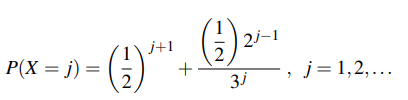

b)

Estime E(X) con 1000 repeticiones y compare con la esperanza exacta.


In [3]:
def ej10_ti():
    i = 1
    t1 = (1/2)**2
    t2 = (1/2)/3
    acumulada = t1 + t2
    u = random.random()
    while u >= acumulada:
        i += 1
        t1 *= (1/2)
        t2 *= (2/3)
        acumulada += t1 + t2
    return i



nsims = 1000
sumatoria = 0
for _ in range(nsims):
  sumatoria += ej10_ti()
print(f"Esperanza: {sumatoria/nsims}")

Esperanza: 2.555


# Ejercicio 11

In [1]:
# Ejercicio hecho en clase

#@title algoritmo de tasa de riesgo
def x_tasa_discreta(p,**kwargs):
    """
    Metodo de la tasa discreta
    """

    k = 1
    sum = 1
    l = 1
    while True:
        u = random.random()
        if k == 1:
            pass
        else:
          sum -= p(x=k-1,**kwargs)
          # sum -= l*sum
        l = p(x=k,**kwargs)/sum
        if u < l:
            return k
        k += 1

def geom_tasa_discreta(pr):
    """
    Metodo de la tasa discreta para una variable geometrica
    """

    k = 1
    while True:
        u = random.random()
        if u < pr:
            return k
        k += 1